In [93]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-bright")

In [94]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_parquet(r"../../../data/agurin.parquet")

In [95]:
df.shape

(100, 200)

In [96]:
df.head()

,gameCreation,gameEndTimestamp,gameDuration,gameVersion,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,totalDamageDealtToChampions,totalTimeSpentDead,wardsKilled,wardsPlaced,win,teamId,allyTopPick,allyJunglePick,allyMiddlePick,allyBottomPick,allySupportPick,enemyTopPick,enemyJunglePick,enemyMiddlePick,enemyBottomPick,enemySupportPick,laneOpponent,allyTopBan,allyJungleBan,allyMiddleBan,allyBottomBan,allySupportBan,enemyTopBan,enemyJungleBan,enemyMiddleBan,enemyBottomBan,enemySupportBan,Maxi,Moritz,Niclas,Aaron,totalAllyTeamKills,totalAllyTeamDeaths,gold@0,gold@1,gold@2,gold@3,gold@4,gold@5,gold@6,gold@7,gold@8,gold@9,gold@10,gold@11,gold@12,gold@13,gold@14,gold@15,gold@16,gold@17,gold@18,gold@19,gold@20,gold@21,gold@22,gold@23,gold@24,gold@25,gold_diff@0,gold_diff@1,gold_diff@2,gold_diff@3,gold_diff@4,gold_diff@5,gold_diff@6,gold_diff@7,gold_diff@8,gold_diff@9,gold_diff@10,gold_diff@11,gold_diff@12,gold_diff@13,gold_diff@14,gold_diff@15,gold_diff@16,gold_diff@17,gold_diff@18,gold_diff@19,gold_diff@20,gold_diff@21,gold_diff@22,gold_diff@23,gold_diff@24,gold_diff@25,cs@0,cs@1,cs@2,cs@3,cs@4,cs@5,cs@6,cs@7,cs@8,cs@9,cs@10,cs@11,cs@12,cs@13,cs@14,cs@15,cs@16,cs@17,cs@18,cs@19,cs@20,cs@21,cs@22,cs@23,cs@24,cs@25,deathBeforeMin5,totalTeamGoldDiff@5,totalTeamGoldDiff@10,totalTeamGoldDiff@15,totalTeamGoldDiff@20,puuid,gold@26,gold@27,gold@28,gold@29,gold_diff@26,gold_diff@27,gold_diff@28,gold_diff@29,cs@26,cs@27,cs@28,cs@29,gold@30,gold@31,gold@32,gold_diff@30,gold_diff@31,gold_diff@32,cs@30,cs@31,cs@32,gold@33,gold_diff@33,cs@33,gold@34,gold_diff@34,cs@34,gold@35,gold@36,gold@37,gold@38,gold_diff@35,gold_diff@36,gold_diff@37,gold_diff@38,cs@35,cs@36,cs@37,cs@38,gold@39,gold@40,gold@41,gold_diff@39,gold_diff@40,gold_diff@41,cs@39,cs@40,cs@41,gold@42,gold@43,gold@44,gold@45,gold_diff@42,gold_diff@43,gold_diff@44,gold_diff@45,cs@42,cs@43,cs@44,cs@45,gameDuration_m_s,onBlueSide,timeBetweenGames,session
matchId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EUW1_6697066109,2023-11-29 11:54:37,2023-11-29 12:19:16,1458,13.23,7,1,5,Brand,True,False,False,False,False,True,10827,11037,429,False,JUNGLE,12594,10,6,12,True,100,Aatrox,Brand,Jayce,Ziggs,Senna,Yone,Diana,Syndra,Caitlyn,Ashe,Diana,Ivern,Rengar,Nautilus,Orianna,Vayne,Janna,Akali,Graves,Draven,Rengar,False,False,False,False,21,15,500,500,611,1083,1498,1810,2192,2398,3276,3617,4054,4812,5346,5536,5733,6526,6924,7610.0,7937.0,8566.0,9128.0,9416.0,9662.0,10123.0,10640.0,10827.0,0,0,5,180,472,318,417,314,881,1005,840,1476,1693,1581,933,1233,1130,1693.0,1502.0,1618.0,1848.0,1331.0,1118.0,847.0,1003.0,1153.0,0,0,4,20,24,34,44,49,57,65,77,86,94,100,100,114,124,130.0,138.0,148.0,168.0,173.0,176.0,190.0,194.0,194.0,False,192,145,1543,4099.0,oeZSx8R-ZO8tjVK9xApBQmhow99bHaCfO0YsiOVXv4CZSP...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24:18,True,NaT,0
EUW1_6696009082,2023-11-28 15:52:22,2023-11-28 16:12:10,1172,13.23,4,6,3,Ahri,False,False,False,True,False,True,8314,9031,1165,False,MIDDLE,12030,115,0,7,False,200,Rumble,Kayn,Ahri,Varus,Rakan,Gragas,XinZhao,Leblanc,Ezreal,Senna,Leblanc,Kalista,Ivern,Graves,Janna,Belveth,Yone,Brand,Graves,Pyke,KSante,False,False,False,False,14,21,500,500,612,853,1253,1536,1872,2044,2668,2854,3158,3552,4933,5473,6420,7049,7282,7404.0,8013.0,8249.0,8314.0,NaN,NaN,NaN,NaN,NaN,0,0,7,-123,14,-300,-342,-397,-345,-843,-1101,-1015,153,173,740,1162,1095,610.0,991.0,676.0,398.0,NaN,NaN,NaN,NaN,NaN,0,0,5,12,26,33,43,43,52,56,67,79,83,93,

<Axes: ylabel='laneOpponent'>

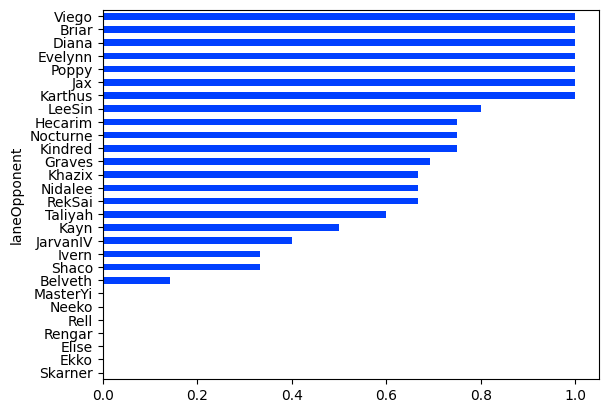

In [224]:
filt = df["championName"] == "Brand"

lane_opponent_games = df.loc[filt, "laneOpponent"].value_counts()
lane_opponent_winrate = df.loc[filt].groupby("laneOpponent")["win"].value_counts(normalize=True).unstack(fill_value=0)[True]
lane_opponent_winrate.sort_values().plot(kind="barh")


In [237]:
pd.Series(lane_opponent_games, name="Games")
pd.Series(lane_opponent_winrate, name="Winrate")
merged = pd.merge(left=lane_opponent_games, right=lane_opponent_winrate, how="inner", on="laneOpponent", suffixes=('_games', '_winrate'))
merged

,count,True
laneOpponent,,
Graves,13,0.692308
JarvanIV,10,0.400000
Belveth,7,0.142857
Taliyah,5,0.600000
LeeSin,5,0.800000
Nocturne,4,0.750000
Viego,4,1.000000
Kindred,4,0.750000
Hecarim,4,0.750000


In [240]:
import matplotlib.pyplot as plt

filt = merged["count"] > 1
merged = merged.loc[filt]

plt.figure(figsize=(8, 6))

# Assuming lane_opponent_games and lane_opponent_winrate are your data
plt.scatter(merged["count"], merged[True])

# Add labels for each point
for champion, games, winrate in zip(merged.index, merged["count"], merged[True]):
    plt.text(games, winrate, champion, fontsize=11, ha='right', va='bottom')

plt.title('Scatter Plot of Win Rate vs. Games Played')
plt.xlabel('Games Played')
plt.ylabel('Win Rate (%)')

plt.grid(True)
plt.show()


,count,True
laneOpponent,,
Graves,13,0.692308
JarvanIV,10,0.400000
Belveth,7,0.142857
Taliyah,5,0.600000
LeeSin,5,0.800000
Nocturne,4,0.750000
Viego,4,1.000000
Kindred,4,0.750000
Hecarim,4,0.750000


In [209]:
filt = (df["championName"] == "Brand") & (df["laneOpponent"] == "JarvanIV")
print(df.loc[filt].shape[0])
df.loc[filt, "win"].value_counts() / df.loc[filt].shape[0]

10


win
False    0.6
True     0.4
Name: count, dtype: float64

#### Percentage of Roles

<Axes: xlabel='teamPosition'>

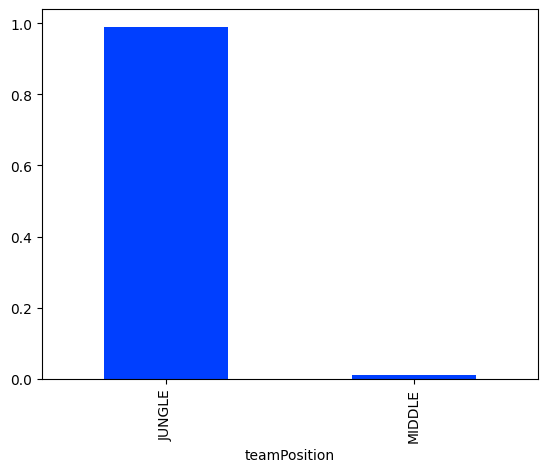

In [97]:
df["teamPosition"].value_counts(normalize=True).plot(kind="bar")

#### Percentage of Mid lane Champions

<Axes: ylabel='championName'>

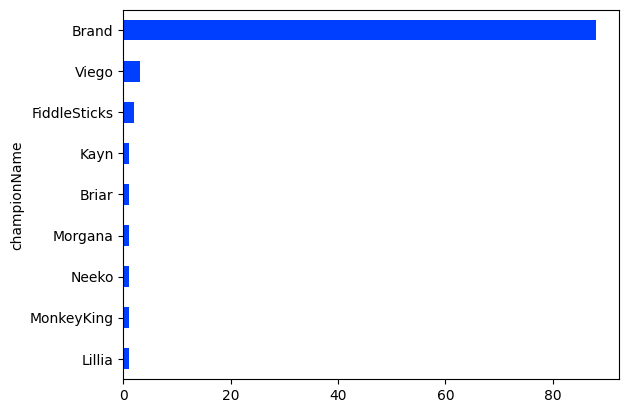

In [98]:
filt = df["teamPosition"] == "JUNGLE"
df.loc[filt, "championName"].value_counts().sort_values().plot(kind="barh")

In [99]:
# df.loc[filt, "championName"].value_counts(normalize=True).head(7).index
df.loc[filt, "championName"].value_counts(normalize=True)

championName
Brand           0.888889
Viego           0.030303
FiddleSticks    0.020202
Lillia          0.010101
MonkeyKing      0.010101
Neeko           0.010101
Morgana         0.010101
Briar           0.010101
Kayn            0.010101
Name: proportion, dtype: float64

#### Get Top 5 % pickrate champions

In [100]:
# Calculate the normalized value counts for championName
value_counts_normalized = df['championName'].value_counts(normalize=True)

# Define a percentage threshold
percentage_threshold = 0.05

# Filter champion names with a percentage greater than the threshold
selected_champions = value_counts_normalized[value_counts_normalized > percentage_threshold].index
selected_champions

Index(['Brand'], dtype='object', name='championName')

<Axes: xlabel='championName'>

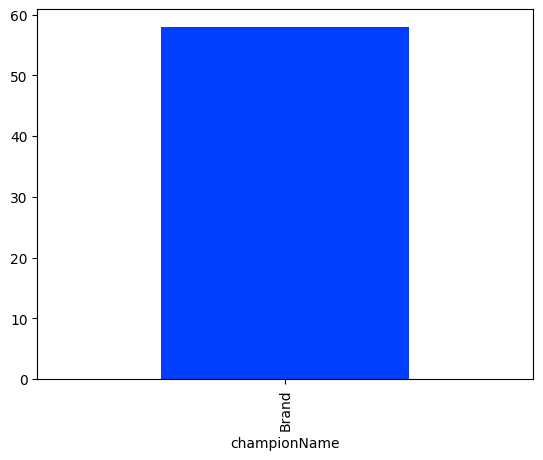

In [101]:
filt = df["championName"].isin(selected_champions)
win_rates = df.loc[filt].groupby("championName")["win"].value_counts(normalize=True, sort=True)[:, True] * 100
win_rates.plot(kind="bar")

#### Most Midlane opponents

<Axes: ylabel='laneOpponent'>

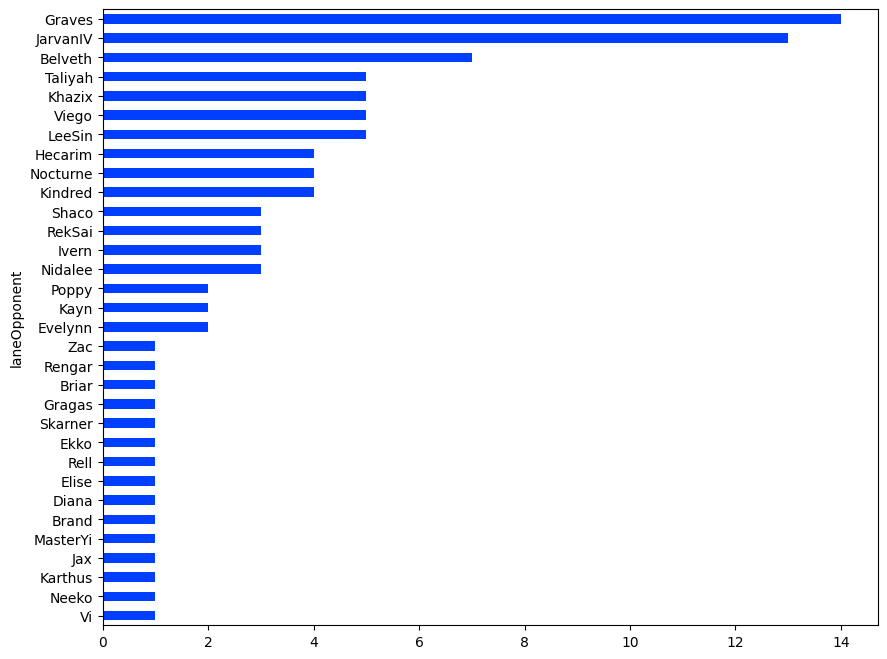

In [102]:
filt = df["teamPosition"] == "JUNGLE"
df.loc[filt, "laneOpponent"].value_counts().sort_values().plot(kind="barh", figsize=(10, 8))

In [103]:
# Calculate the normalized value counts for championName
value_counts_normalized = df.loc[filt, "laneOpponent"].value_counts(normalize=True)

# Define a percentage threshold
percentage_threshold = 0.05

# Filter lane opponents names with a percentage greater than the threshold
selected_lane_opponents = value_counts_normalized[value_counts_normalized > percentage_threshold].index
selected_lane_opponents

Index(['Graves', 'JarvanIV', 'Belveth', 'Taliyah', 'Khazix', 'Viego',
       'LeeSin'],
      dtype='object', name='laneOpponent')

#### Winrate against the opponent champions in midlane with playrate >= 5 %

<Axes: xlabel='laneOpponent'>

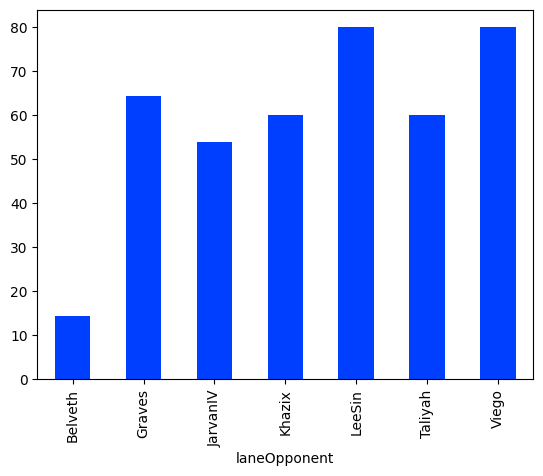

In [104]:
filt = df["laneOpponent"].isin(selected_lane_opponents)
win_rates_against = df.loc[filt].groupby("laneOpponent")["win"].value_counts(normalize=True, sort=True)[:, True] * 100
win_rates_against.plot(kind="bar")

#### Winrate for each lane

<Axes: xlabel='teamPosition'>

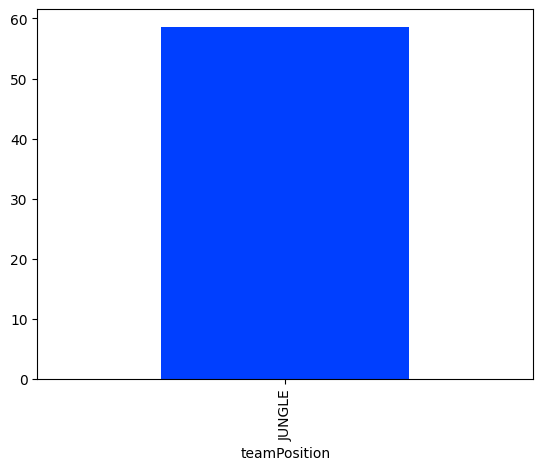

In [105]:
(df.groupby("teamPosition")["win"].value_counts(normalize=True)[:, True] * 100).plot(kind="bar")

#### winrates with champion in own team

* maybe change data frame that allyRolePick is NaN when teamPosition == Role

In [106]:
# Use melt to reshape the DataFrame into a long format
melted_df = pd.melt(df, value_vars=["allyTopPick", "allyJunglePick", "allyMiddlePick", "allyBottomPick", "allySupportPick"])

# Calculate value counts for the melted DataFrame
value_counts_result = melted_df['value'].value_counts()

print("Combined Value Counts:")
value_counts_result


Combined Value Counts:


value
Brand           88
Jayce           15
Nautilus        14
Ashe            11
Yone            11
Aatrox          11
Varus           10
Ezreal          10
Draven           9
Rakan            9
Jax              8
Kaisa            8
Ornn             8
Tristana         8
Pyke             8
Kalista          7
Syndra           7
Janna            6
Sylas            6
Thresh           6
Ahri             6
Vayne            6
Kled             5
Senna            5
Caitlyn          5
Jinx             5
Akali            5
Braum            5
Rell             5
Jhin             5
Twitch           5
Renata           5
Bard             5
Camille          5
Renekton         5
KSante           5
Xayah            5
Kassadin         4
Neeko            4
Orianna          4
Yasuo            4
Samira           4
Riven            4
Tryndamere       4
Ziggs            4
Rumble           3
Azir             3
Leblanc          3
Zed              3
Irelia           3
Ekko             3
Galio            3
Panthe

#### Winrate on blue side

<Axes: xlabel='teamId'>

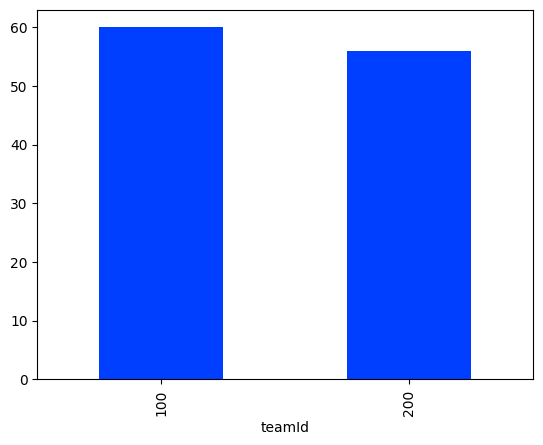

In [107]:
(df.groupby("teamId")["win"].value_counts(normalize=True)[:, True] * 100).plot(kind="bar")

#### Gold earn in wins

In [108]:
import matplotlib.pyplot as plt

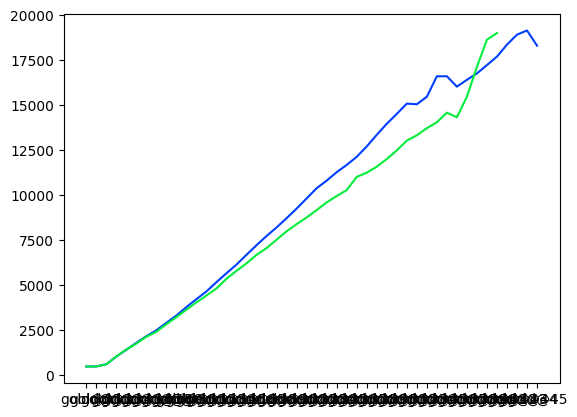

In [109]:
filt = df["win"]
df_wins  = df.loc[filt]

# Calculate the mean for the "gold" columns in the wins DataFrame
mean_gold_wins = df_wins.filter(like='gold@').mean(axis=0)

plt.plot(mean_gold_wins)

df_loses  = df.loc[~filt]

# Calculate the mean for the "gold" columns in the wins DataFrame
mean_gold_wins = df_loses.filter(like='gold@').mean(axis=0)

plt.plot(mean_gold_wins)

plt.show()

#### Gold diff to lane opponent in wins and loses

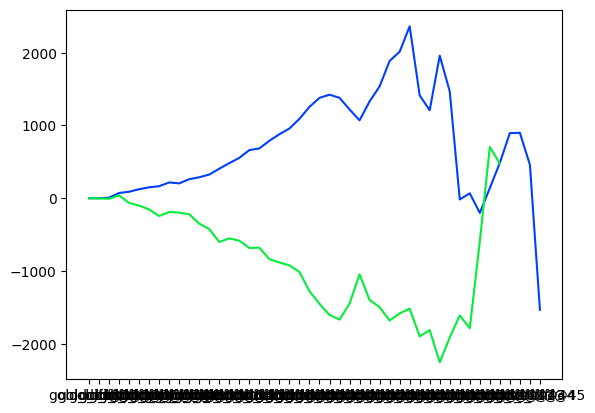

In [110]:
filt = df["win"]
df_wins  = df.loc[filt]

mean_gold_diff_wins = df_wins.filter(like='gold_diff@').mean(axis=0)
plt.plot(mean_gold_diff_wins)

df_loses  = df.loc[~filt]

mean_gold_diff_loses = df_loses.filter(like='gold_diff@').mean(axis=0)

plt.plot(mean_gold_diff_loses)

plt.show()

#### Average amount of Games per Session

<Axes: xlabel='session'>

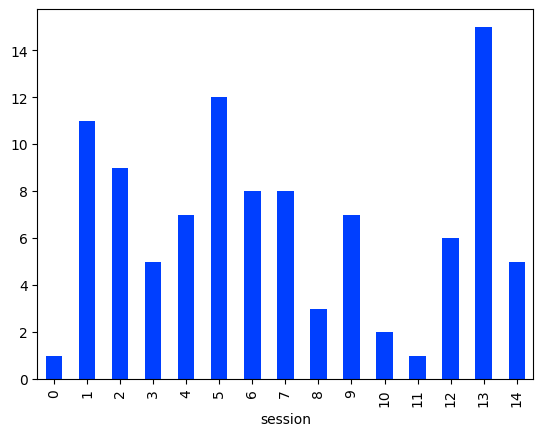

In [111]:
df["session"].value_counts(sort=False).plot(kind="bar")

#### Most banned Champion by Noway

* change to championName, championBanned: teamPosition == Middle -> allyMiddlePick = NaN

In [112]:
for role in df["teamPosition"].str.capitalize().values:
    print(df[f"ally{role}Ban"])

matchId
EUW1_6697066109      Rengar
EUW1_6696009082       Ivern
EUW1_6695964259      KSante
EUW1_6695920195       Senna
EUW1_6695868114       Ivern
EUW1_6695833992       Milio
EUW1_6695786938      Syndra
EUW1_6695762978      Syndra
EUW1_6695747490     Orianna
EUW1_6695722267      LeeSin
EUW1_6695709701       Ivern
EUW1_6695682234      Irelia
EUW1_6694735936       Talon
EUW1_6694674973     Orianna
EUW1_6694634435    Malphite
EUW1_6694589274       Ivern
EUW1_6694555013       Xayah
EUW1_6694521660     Belveth
EUW1_6694471938       Senna
EUW1_6694436728    JarvanIV
EUW1_6694397148      Draven
EUW1_6692923339     Orianna
EUW1_6692875288       NoBan
EUW1_6692844791      LeeSin
EUW1_6692791275     Warwick
EUW1_6692760090    Renekton
EUW1_6691362388         Jax
EUW1_6691322620     Orianna
EUW1_6691279502     Leblanc
EUW1_6691233907     Taliyah
EUW1_6691190650       Ivern
EUW1_6691135237      Graves
EUW1_6691099792       Varus
EUW1_6690034512      Syndra
EUW1_6689978737       Kaisa
EUW1_6689929

#### Most played mid lane champion match ups

<Axes: ylabel='laneOpponent'>

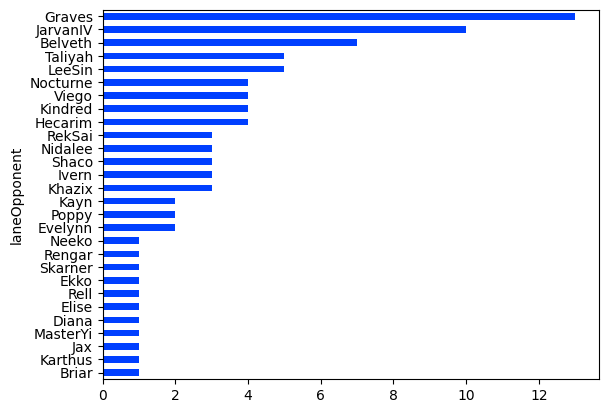

In [113]:
most_played_champion = df["championName"].value_counts().head(1).index.item()

filt = df["championName"] == most_played_champion
df.loc[filt, "laneOpponent"].value_counts().sort_values().plot(kind="barh")

#### most played against

<Axes: ylabel='laneOpponent'>

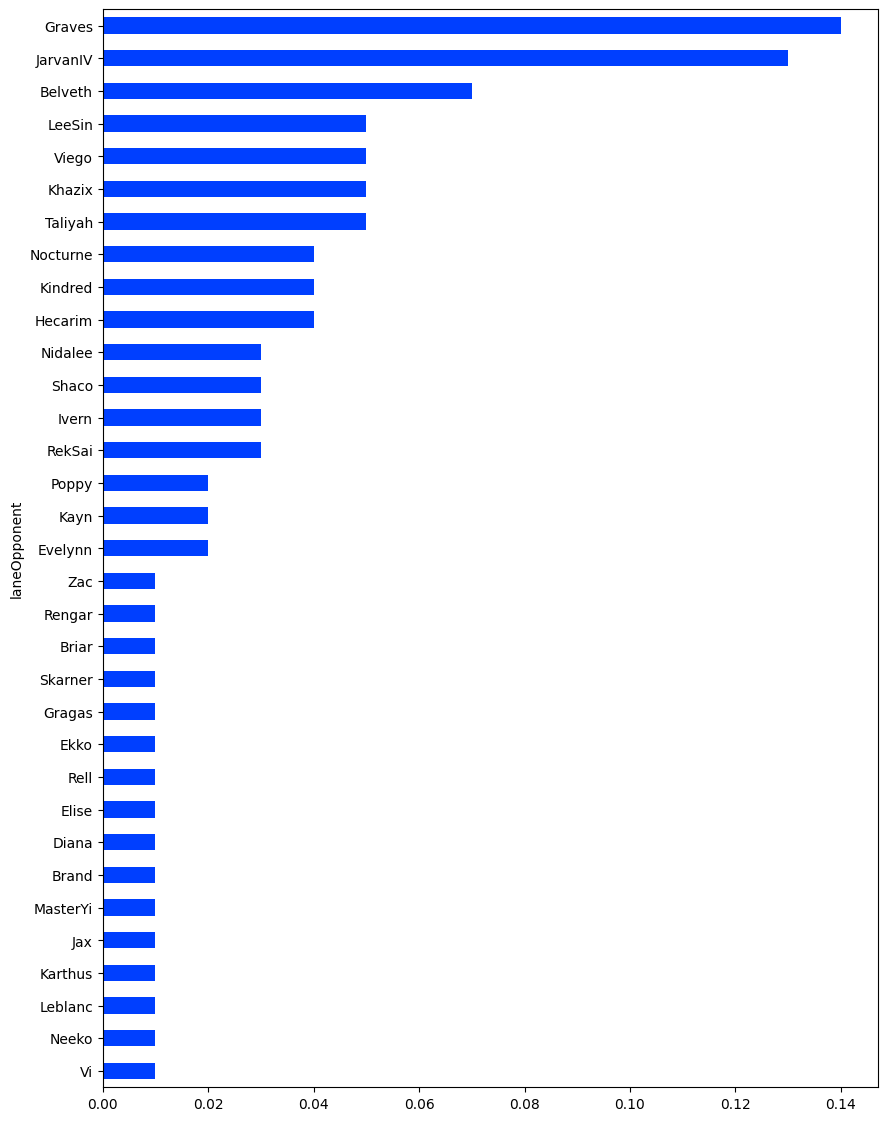

In [114]:
df["laneOpponent"].value_counts(normalize=True).sort_values().plot(kind="barh", figsize=(10, 14))

#### most picked enemy champion

In [115]:
melted_df = pd.melt(df, value_vars=["enemyTopPick", "enemyJunglePick", "enemyMiddlePick", "enemyBottomPick", "enemySupportPick"])

# Calculate value counts for the melted DataFrame
value_counts_result = melted_df['value'].value_counts()

print("Combined Value Counts:")
value_counts_result

Combined Value Counts:


value
Kaisa           16
Syndra          16
Orianna         15
Graves          14
JarvanIV        13
Yone            11
Nautilus        11
Rell            11
Ezreal          10
Jinx             9
Rakan            9
Ashe             9
Renekton         9
Vayne            8
Akali            8
Senna            8
Thresh           7
Jax              7
Belveth          7
Taliyah          7
Sylas            6
Caitlyn          6
Viego            6
Janna            6
Yasuo            6
Jhin             5
Rumble           5
Pyke             5
LeeSin           5
Twitch           5
Aphelios         5
Varus            5
Xayah            5
Kennen           5
Poppy            5
Khazix           5
Neeko            5
Aatrox           5
KSante           5
Leblanc          5
Nocturne         4
Hecarim          4
AurelionSol      4
Riven            4
Renata           4
Gragas           4
Karma            4
Kindred          4
Alistar          4
Irelia           3
Taric            3
Draven           3
RekSai

#### champion combinations

* Mid / Jungle

<Axes: ylabel='enemyJunglePick,enemyMiddlePick'>

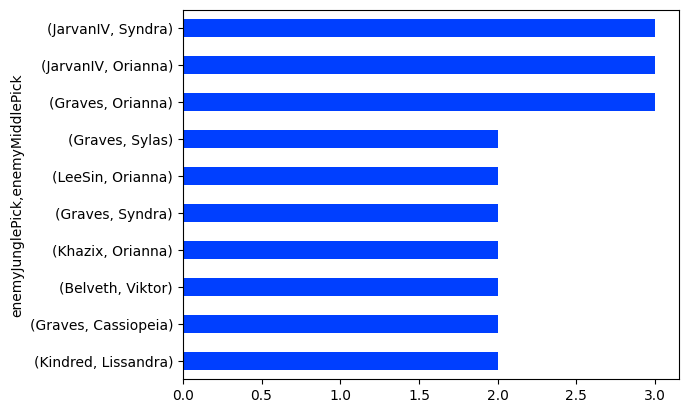

In [116]:
df[["enemyJunglePick", "enemyMiddlePick"]].value_counts().head(10).sort_values().plot(kind="barh")

<Axes: ylabel='allyJunglePick,allyMiddlePick'>

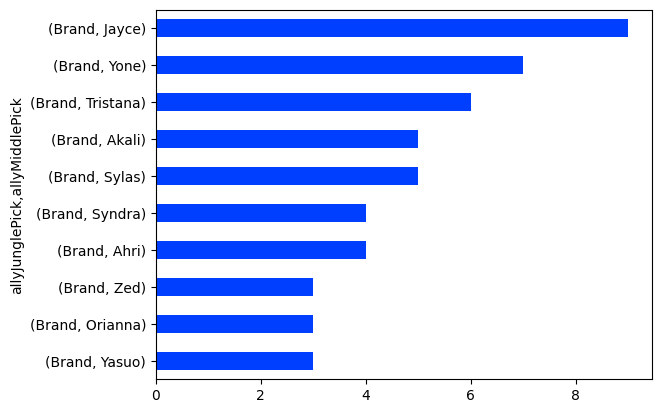

In [117]:
df[["allyJunglePick", "allyMiddlePick"]].value_counts().head(10).sort_values().plot(kind="barh")

* Bottom / Support

<Axes: ylabel='enemyBottomPick,enemySupportPick'>

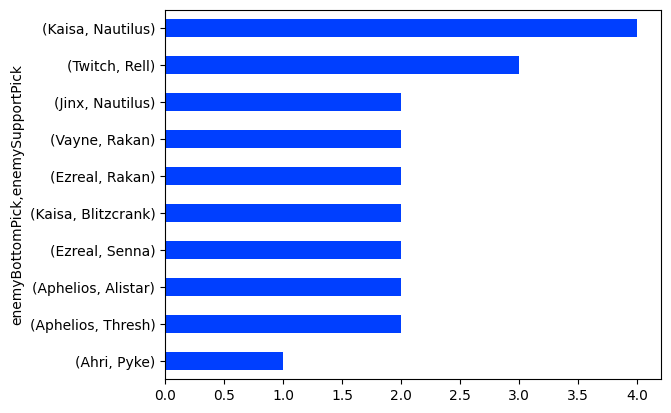

In [118]:
df[["enemyBottomPick", "enemySupportPick"]].value_counts().head(10).sort_values().plot(kind="barh")

<Axes: ylabel='allyBottomPick,allySupportPick'>

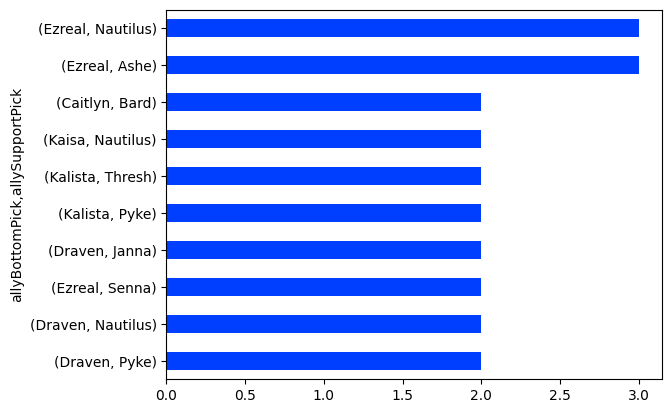

In [119]:
df[["allyBottomPick", "allySupportPick"]].value_counts().head(10).sort_values().plot(kind="barh")

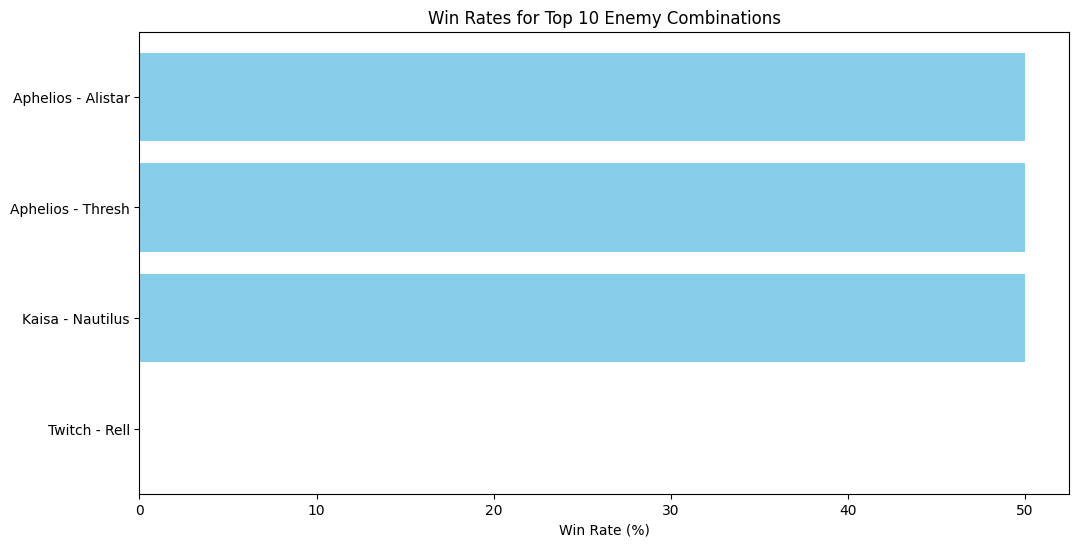

In [120]:
top_combinations = df[["enemyBottomPick", "enemySupportPick"]].value_counts().head(4)

# Initialize lists to store data for plotting
bottom_support_combinations = []
win_rates = []


for bottom, support in top_combinations.index:
    filt = (df["enemyBottomPick"] == bottom) & (df["enemySupportPick"] == support)
    win_rate = df.loc[filt, "win"].mean() * 100
    win_rate = win_rate if not pd.isna(win_rate) else 0

    bottom_support_combinations.append(f"{bottom} - {support}")
    win_rates.append(win_rate)


# Sort combinations by win rate
sorted_combinations = sorted(zip(bottom_support_combinations, win_rates), key=lambda x: x[1], reverse=False)

# Unpack the sorted pairs
sorted_combinations, sorted_win_rates = zip(*sorted_combinations)

# Plot all combinations in a single horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(sorted_combinations, sorted_win_rates, color='skyblue')
plt.xlabel('Win Rate (%)')
plt.title('Win Rates for Top 10 Enemy Combinations')
plt.show()

In [121]:
filt = (df["enemyBottomPick"] == "Kaisa") & (df["enemySupportPick"] == "Nautilus")
df.loc[filt, "win"]

matchId
EUW1_6695762978    False
EUW1_6694634435     True
EUW1_6691135237    False
EUW1_6688530928     True
Name: win, dtype: bool

#### Average kills per game (both teams)

In [122]:
average_kills_per_game = (df["totalAllyTeamKills"] + df["totalAllyTeamDeaths"]).sum() / df.shape[0]
f"Average kills per game: {average_kills_per_game}"

'Average kills per game: 55.69'

#### Average kills per Minute

In [123]:
average_game_time_s = df["gameDuration"].sum() / df.shape[0]
average_kills_per_minute = average_kills_per_game / (average_game_time_s / 60)
f"Average kills per minute: {average_kills_per_minute}"

'Average kills per minute: 2.037153326057931'

#### Winrate when first tower killed by noway

In [124]:
filt = (df["firstTowerKill"] == True) | (df["firstTowerAssist"] == True)
df.loc[filt, "win"].mean() * 100

83.33333333333334

#### Winrate when first blood by noway

In [125]:
filt = (df["firstBloodKill"] == True) | (df["firstBloodAssist"] == True)
df.loc[filt, "win"].mean() * 100

60.0

#### Percentage of games on blue side

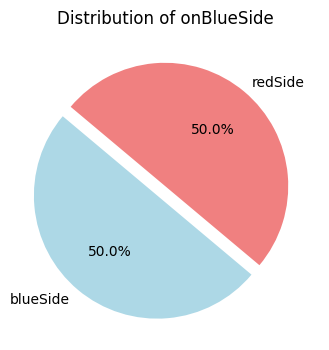

In [126]:
# Plotting the pie chart
plt.figure(figsize=(4, 4))
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # To emphasize the first slice
labels = ["blueSide", "redSide"] # df["onBlueSide"].value_counts().index
sizes = df["onBlueSide"].value_counts(normalize=True) * 100

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of onBlueSide')
plt.show()

#### Game time distribution

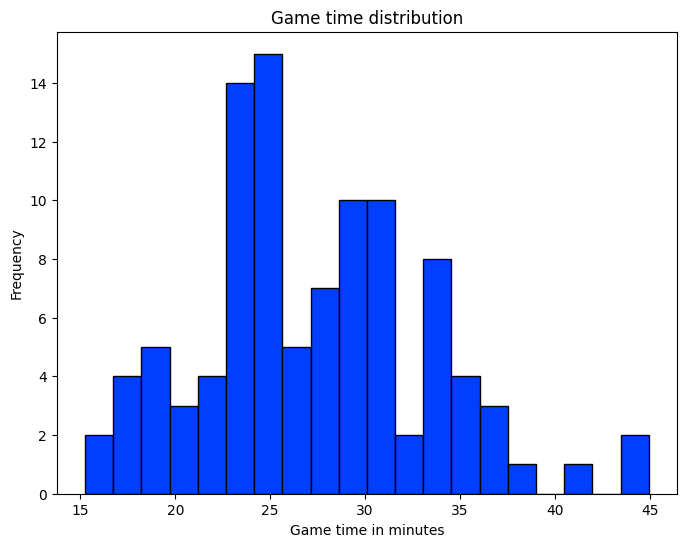

In [127]:
data = df["gameDuration"] / 60

# Plotting a histogram with bins
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel('Game time in minutes')
plt.ylabel('Frequency')
plt.title('Game time distribution')
plt.show()

#### correlation between deaths and win rate

In [128]:
(df.groupby("deaths")["win"].value_counts(normalize=True)[:, True] * 100)

deaths
0     100.000000
1     100.000000
2      85.714286
3      87.500000
4     100.000000
5      76.923077
6      72.727273
7      44.444444
8      28.571429
10     12.500000
Name: proportion, dtype: float64

In [129]:
filt = df["deaths"] == 11
df.loc[filt]

,gameCreation,gameEndTimestamp,gameDuration,gameVersion,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,totalDamageDealtToChampions,totalTimeSpentDead,wardsKilled,wardsPlaced,win,teamId,allyTopPick,allyJunglePick,allyMiddlePick,allyBottomPick,allySupportPick,enemyTopPick,enemyJunglePick,enemyMiddlePick,enemyBottomPick,enemySupportPick,laneOpponent,allyTopBan,allyJungleBan,allyMiddleBan,allyBottomBan,allySupportBan,enemyTopBan,enemyJungleBan,enemyMiddleBan,enemyBottomBan,enemySupportBan,Maxi,Moritz,Niclas,Aaron,totalAllyTeamKills,totalAllyTeamDeaths,gold@0,gold@1,gold@2,gold@3,gold@4,gold@5,gold@6,gold@7,gold@8,gold@9,gold@10,gold@11,gold@12,gold@13,gold@14,gold@15,gold@16,gold@17,gold@18,gold@19,gold@20,gold@21,gold@22,gold@23,gold@24,gold@25,gold_diff@0,gold_diff@1,gold_diff@2,gold_diff@3,gold_diff@4,gold_diff@5,gold_diff@6,gold_diff@7,gold_diff@8,gold_diff@9,gold_diff@10,gold_diff@11,gold_diff@12,gold_diff@13,gold_diff@14,gold_diff@15,gold_diff@16,gold_diff@17,gold_diff@18,gold_diff@19,gold_diff@20,gold_diff@21,gold_diff@22,gold_diff@23,gold_diff@24,gold_diff@25,cs@0,cs@1,cs@2,cs@3,cs@4,cs@5,cs@6,cs@7,cs@8,cs@9,cs@10,cs@11,cs@12,cs@13,cs@14,cs@15,cs@16,cs@17,cs@18,cs@19,cs@20,cs@21,cs@22,cs@23,cs@24,cs@25,deathBeforeMin5,totalTeamGoldDiff@5,totalTeamGoldDiff@10,totalTeamGoldDiff@15,totalTeamGoldDiff@20,puuid,gold@26,gold@27,gold@28,gold@29,gold_diff@26,gold_diff@27,gold_diff@28,gold_diff@29,cs@26,cs@27,cs@28,cs@29,gold@30,gold@31,gold@32,gold_diff@30,gold_diff@31,gold_diff@32,cs@30,cs@31,cs@32,gold@33,gold_diff@33,cs@33,gold@34,gold_diff@34,cs@34,gold@35,gold@36,gold@37,gold@38,gold_diff@35,gold_diff@36,gold_diff@37,gold_diff@38,cs@35,cs@36,cs@37,cs@38,gold@39,gold@40,gold@41,gold_diff@39,gold_diff@40,gold_diff@41,cs@39,cs@40,cs@41,gold@42,gold@43,gold@44,gold@45,gold_diff@42,gold_diff@43,gold_diff@44,gold_diff@45,cs@42,cs@43,cs@44,cs@45,gameDuration_m_s,onBlueSide,timeBetweenGames,session
matchId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EUW1_6690034512,2023-11-24 16:48:20,2023-11-24 17:23:18,2081,13.23,8,11,15,Brand,False,False,False,False,False,False,15220,49627,1636,False,JUNGLE,56760,325,8,17,False,100,Sion,Brand,Sylas,Xayah,Bard,Olaf,Graves,Swain,Jinx,Thresh,Graves,LeeSin,Syndra,Senna,Janna,Aatrox,Irelia,Fiora,Taliyah,Nidalee,Draven,False,False,False,False,33,55,500,500,611,1107,1380,1840,2187,2504,3051,3459,4142,4398,5170,5373,5995,6473,7045,7643.0,7829.0,7951.0,8129.0,8842.0,9059.0,9332.0,10222.0,10344.0,0,0,0,140,154,43,44,-280,145,16,211,198,533,-98,352,275,-15,186.0,-170.0,-800.0,-1237.0,-1330.0,-1635.0,-2335.0,-1731.0,-2446.0,0,0,4,20,27,35,45,55,55,63,67,71,77,83,83,83,95,113.0,117.0,117.0,117.0,125.0,129.0,129.0,143.0,143.0,True,200,526,2285,-3642.0,oeZSx8R-ZO8tjVK9xApBQmhow99bHaCfO0YsiOVXv4CZSP...,10813.0,11767.0,12671.0,13234.0,-3321.0,-2814.0,-2033.0,-2986.0,150.0,164.0,174.0,183.0,13625.0,14061.0,14463.0,-3613.0,-3964.0,-5136.0,184.0,196.0,196.0,14600.0,-5755.0,197.0,15099.0,-5823.0,208.0,15220.0,NaN,NaN,NaN,-5968.0,NaN,NaN,NaN,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34:41,True,0 days 16:48:30,5
EUW1_6689782941,2023-11-24 13:48:17,2023-11-24 14:24:31,2155,13.23,4,11,10,Brand,False,False,False,False,False,False,13651,18169,619,False,JUNGLE,21499,250,9,8,False,200,Jax,Brand,Xerath,Ashe,MissFortune,Aatrox,Shaco,Orianna,Aphelios,Thresh,Shaco,Draven,Rengar,Sylas,Nidalee,Fiora,Graves,Draven,Senna,Leblanc,Jinx,False,False,False,False,23,37,500,500,611,1083,1315,1692,2183,2381,2518,2955,3369,3541,3789,3986,4424,4830,5275,5695.0,5968.0,6106.0,7623.0,7990.0,8357.0,8489.0,8841.0,9027.0,0,0,15,166,-575,-40

<Axes: xlabel='deaths'>

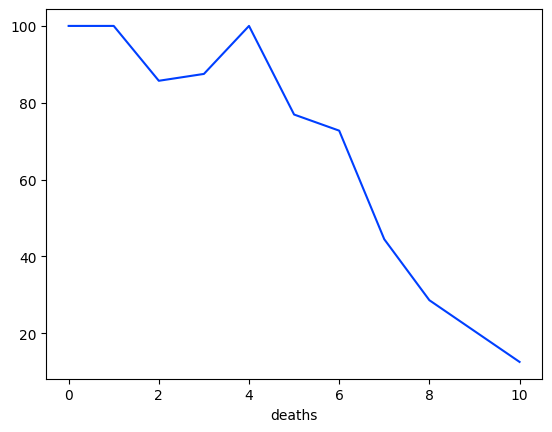

In [130]:
(df.groupby("deaths")["win"].value_counts(normalize=True)[:, True] * 100).plot()

#### Aufteilung Queue-time, totalTimeSpentDead, Gameplay

<Axes: title={'center': 'Total time in percentage'}>

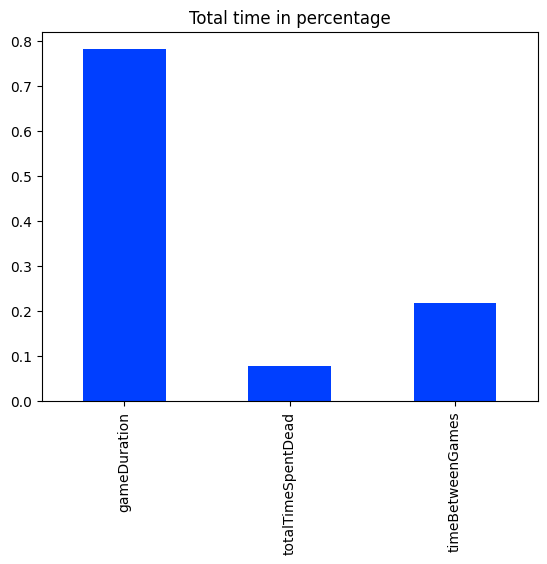

In [131]:
total_game_time_s = df["gameDuration"].sum()
total_time_spent_dead_s = df["totalTimeSpentDead"].sum()
filt = df["timeBetweenGames"] <= pd.Timedelta(minutes=25)
queue_time_s = df.loc[filt, "timeBetweenGames"].sum().total_seconds()

overall_time = total_game_time_s + queue_time_s

df.agg(
    {
        "gameDuration": lambda x: x.sum() / overall_time, #/ 3600,
        "totalTimeSpentDead": lambda x: x.sum() / overall_time, #/ 3600,
        "timeBetweenGames": lambda x: x.loc[x <= pd.Timedelta(minutes=25)].sum().total_seconds() / overall_time, #/ 3600
    }
).plot(kind="bar", title="Total time in percentage")

# overall_time = total_game_time_s + queue_time_s
# overall_time

# total_game_time_s / overall_time
# total_time_spent_dead_s / overall_time
# queue_time_s / overall_time

#### Percentage of time playing mid vs off role

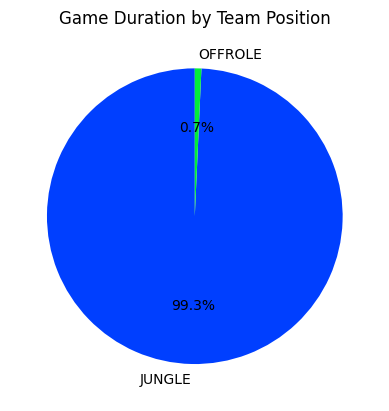

In [132]:
# Add a new category for roles except MIDDLE
df['teamPosition'] = df['teamPosition'].replace({'TOP': 'OFFROLE', 'MIDDLE': 'OFFROLE', 'BOTTOM': 'OFFROLE', 'SUPPORT': 'OFFROLE'})

df["teamPosition"]

# Group by the modified teamPosition and calculate the sum of gameDuration
grouped_data = df.groupby("teamPosition")["gameDuration"].sum()

# Plot the pie chart
grouped_data.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Game Duration by Team Position")
plt.ylabel("")  # Remove y-axis label
plt.show()

#### Winrate if died before min 5

In [138]:
filt = df["deathBeforeMin5"]
df.loc[~filt, "win"].value_counts(normalize=True)
# df.loc[filt].shape[0] / df.shape[0]

win
True     0.684211
False    0.315789
Name: proportion, dtype: float64

In [134]:
cols = ["totalTeamGoldDiff@5", "totalTeamGoldDiff@10", "totalTeamGoldDiff@15", "totalTeamGoldDiff@20", "win"]
df[cols]


,totalTeamGoldDiff@5,totalTeamGoldDiff@10,totalTeamGoldDiff@15,totalTeamGoldDiff@20,win
matchId,,,,,
EUW1_6697066109,192,145,1543,4099.0,True
EUW1_6696009082,666,-1278,22,NaN,False
EUW1_6695964259,201,1922,5626,7436.0,True
EUW1_6695920195,-132,2197,4522,3437.0,True
EUW1_6695868114,1404,2767,3143,496.0,True
EUW1_6695833992,1037,311,1371,-370.0,False
EUW1_6695786938,-549,-3244,-4485,520.0,True
EUW1_6695762978,-819,123,3834,-4699.0,False
EUW1_6695747490,991,2136,7552,NaN,True


In [135]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

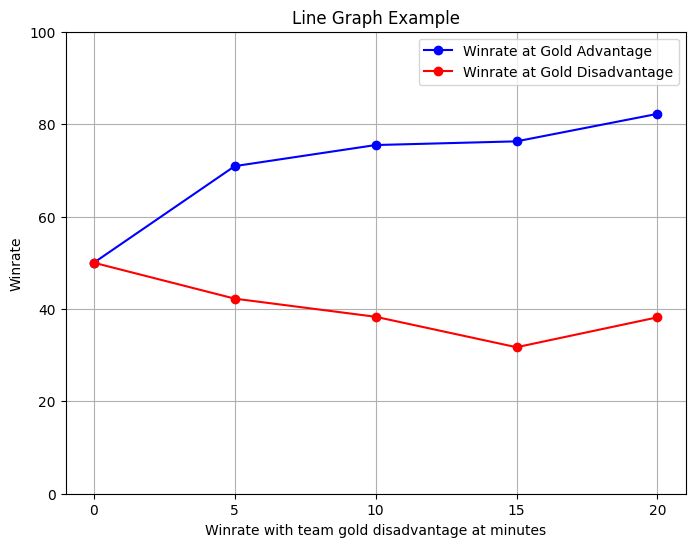

In [136]:
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(8, 6))

cols = ["totalTeamGoldDiff@5", "totalTeamGoldDiff@10", "totalTeamGoldDiff@15", "totalTeamGoldDiff@20"]

x_values = [0]
y_values_adv = [50]
y_values_dis = [50]

for col in cols:
    filt = df[col] > 0
    x_values.append(col.replace("totalTeamGoldDiff@", ""))
    y_values_adv.append(df.loc[filt, "win"].value_counts(normalize=True)[True] * 100)
    y_values_dis.append(df.loc[~filt, "win"].value_counts(normalize=True)[True] * 100)

# Plot the line graph
plt.plot(x_values, y_values_adv, label="Winrate at Gold Advantage", color="blue", marker="o")
plt.plot(x_values, y_values_dis, label="Winrate at Gold Disadvantage", color="red", marker="o")

plt.ylim(0, 100)

# Add labels and title
plt.xlabel('Winrate with team gold disadvantage at minutes')
plt.ylabel('Winrate')
plt.title('Line Graph Example')

plt.legend()
plt.grid()

# Show the plot
plt.show()
